<a href="https://colab.research.google.com/github/poorya-abbasi/DL-HW02/blob/main/PooryaAbbasi_HW02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries & Constants***

In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 39.6MB/s]


In [ ]:
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

# ***Preprocessing***

Reading & displaying data:

In [ ]:
df = pd.read_csv('/content/Dataset.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [ ]:
print(df.shape)

(480, 17)


In [ ]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)



In [ ]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [ ]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])


In [ ]:
# Deviding Dataset to training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_test))

print('Shape of training set features ' ,np.shape(X_train))
print('Shape of training. set classes ' ,np.shape(y_train))
print('Shape of validation set features ' ,np.shape(X_test))
print('Shape of validation set classes ' ,np.shape(y_test))


Number of dataset:  480
Number of train set:  384
Number of validation set:  96
Shape of training set features  (384, 16)
Shape of training. set classes  (384,)
Shape of validation set features  (96, 16)
Shape of validation set classes  (96,)


In [ ]:
from keras.utils import np_utils
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)


# ***Implementing Models***

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

#Config
modelCount = 4
modelLabels = ['5 Layers, 16 Units, ReLu','6 Layers, 32 Units, ReLu','3 Layers, 20 Units, Relu','1 TanH Layer, 6 Layers, 32 Units, ReLu']
l_rate = 0.002
models = []


In [ ]:
def addModel(unitSize,layerCount,function,addTanH = False,addReLu = False):
  model = Sequential()
  #Input Layer
  model.add(BatchNormalization(input_shape=(16,)))
  #Invoking TanH
  if addTanH:
    model.add(Dense(20,kernel_regularizer='l2',activation='tanh'))
  if addReLu:
    model.add(Dense(20,activation='relu'))
  #Adding Layers
  for i in range (0,layerCount):
    model.add(Dense(unitSize,kernel_regularizer='l2',activation=function))
  #Adding Output Layer
  model.add(Dense(3,activation='softmax'))
  # model.summary()
  opt = Adam(learning_rate=l_rate)
  model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
  models.append(model)
  
addModel(16,5,'relu')
print(modelLabels[0],'ready')
addModel(32,6,'relu',addReLu=True)
print(modelLabels[1],'ready')
addModel(20,3,'relu')
print(modelLabels[2],'ready')
addModel(32,6,'relu',addTanH=True)
print(modelLabels[3],'ready')

5 Layers, 16 Units, ReLu ready
6 Layers, 32 Units, ReLu ready
3 Layers, 20 Units, Relu ready
1 TanH Layer, 6 Layers, 32 Units, ReLu ready


# ***Training the model***

In [ ]:
histories = []
for i in range(0,modelCount):
  print("Training", modelLabels[i])
  histories.append(models[i].fit(X_train, y_train_cat, epochs=200, validation_split=0.2,verbose = 0).history)

Training 5 Layers, 16 Units, ReLu
Training 6 Layers, 32 Units, ReLu
Training 3 Layers, 20 Units, Relu
Training 1 TanH Layer, 6 Layers, 32 Units, ReLu


# ***Evaluating the models***

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

**Train Set**

Evaluating 5 Layers, 16 Units, ReLu 

12/12 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.9219
Accuracy of train set: 92.19


Train Predict Report===============

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       103
           1       0.98      0.96      0.97       106
           2       0.91      0.93      0.92       175

    accuracy                           0.92       384
   macro avg       0.93      0.92      0.92       384
weighted avg       0.92      0.92      0.92       384



Train Cunfusion Matrix===============




Evaluating 6 Layers, 32 Units, ReLu 

12/12 [==============================] - 0s 3ms/step - loss: 0.3745 - accuracy: 0.9193
Accuracy of train set: 91.93


Train Predict Report===============

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       103
           1       0.99      0.97      0.98       106
           2       0.94   

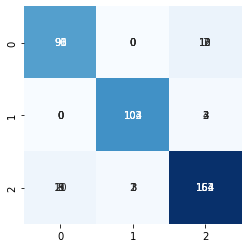

In [ ]:
for i in range(0,modelCount):
  print("Evaluating",modelLabels[i],"\n")
  model = models[i]
  _, acc = model.evaluate(X_train,y_train_cat)
  print('Accuracy of train set: %.2f' % (acc*100))
  y_predict = model.predict(X_train)
  y_p=np.argmax(y_predict, axis=1).reshape(384,1)
  print('\n\nTrain Predict Report===============\n')
  print(classification_report(y_train,y_p))
  print('\n\nTrain Cunfusion Matrix===============\n')
  matrix_confusion=(confusion_matrix(y_train,y_p))
  sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
  print("\n\n================================================================\n")



**Test Set**

Evaluating 5 Layers, 16 Units, ReLu 

3/3 [==============================] - 0s 4ms/step - loss: 0.9267 - accuracy: 0.7188
Accuracy of train set: 71.88


Test Predict Report===============

              precision    recall  f1-score   support

           0       0.79      0.69      0.74        39
           1       0.93      0.67      0.78        21
           2       0.60      0.78      0.67        36

    accuracy                           0.72        96
   macro avg       0.77      0.71      0.73        96
weighted avg       0.75      0.72      0.72        96



Test Cunfusion Matrix===============




Evaluating 6 Layers, 32 Units, ReLu 

3/3 [==============================] - 0s 6ms/step - loss: 0.8942 - accuracy: 0.7292
Accuracy of train set: 72.92


Test Predict Report===============

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.76      0.62      0.68        21
           2       0.62      0.69

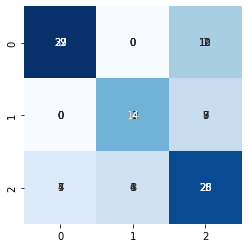

In [ ]:
for i in range(0,modelCount):
  print("Evaluating",modelLabels[i],"\n")
  model = models[i]
  _, acc = model.evaluate(X_test,y_test_cat)
  print('Accuracy of train set: %.2f' % (acc*100))
  y_predict = model.predict(X_test)
  y_p=np.argmax(y_predict, axis=1).reshape(96,1)
  print('\n\nTest Predict Report===============\n')
  print(classification_report(y_test,y_p))
  print('\n\nTest Cunfusion Matrix===============\n')
  matrix_confusion=(confusion_matrix(y_test,y_p))
  sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
  print("\n\n================================================================\n")

# Accuracy Plot



5 Layers, 16 Units, ReLu 



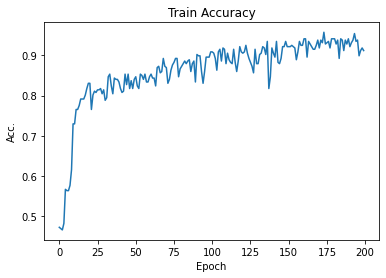



6 Layers, 32 Units, ReLu 



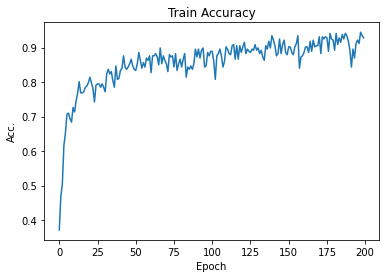



3 Layers, 20 Units, Relu 



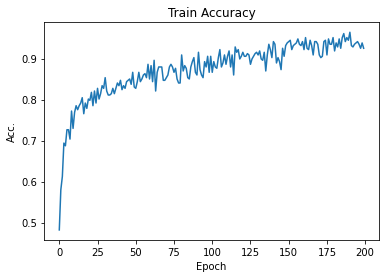



1 TanH Layer, 6 Layers, 32 Units, ReLu 



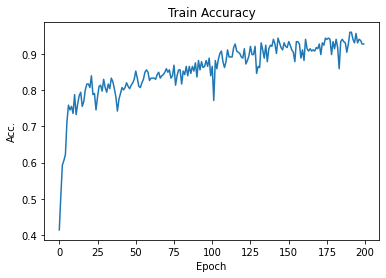



5 Layers, 16 Units, ReLu 



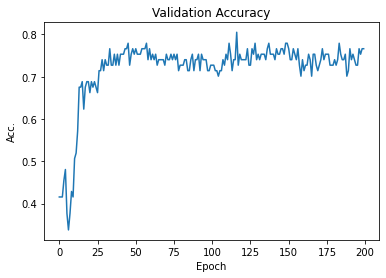



6 Layers, 32 Units, ReLu 



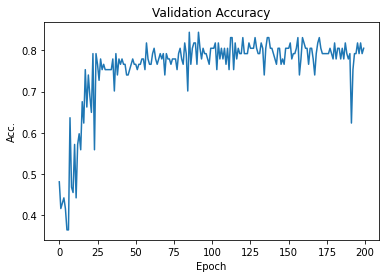



3 Layers, 20 Units, Relu 



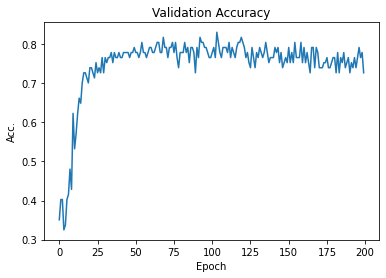



1 TanH Layer, 6 Layers, 32 Units, ReLu 



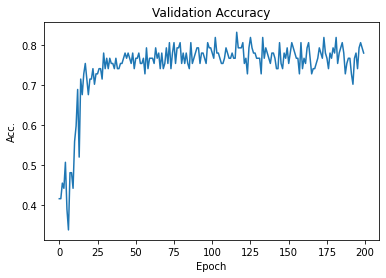

In [ ]:
for i in range(0,modelCount):
  print(modelLabels[i],"\n")
  plt.plot(histories[i]['accuracy'])
  plt.title('Train Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Acc.')
  plt.show()
  print("\n===================\n")


for i in range(0,modelCount):
  print(modelLabels[i],"\n")
  plt.plot(histories[i]['val_accuracy'])
  plt.title('Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Acc.')
  plt.show()
  print("\n===================\n")


# Loss Plot

5 Layers, 16 Units, ReLu 



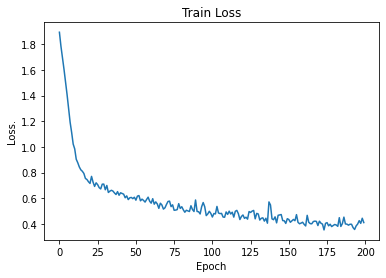



6 Layers, 32 Units, ReLu 



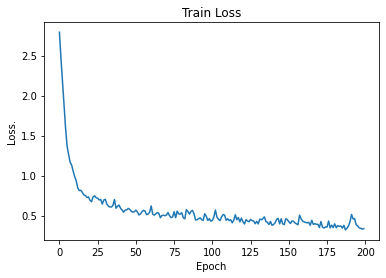



3 Layers, 20 Units, Relu 



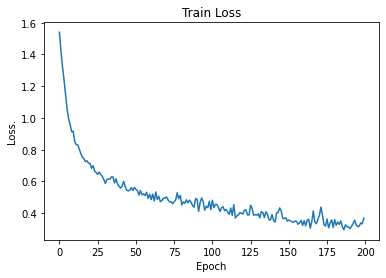



1 TanH Layer, 6 Layers, 32 Units, ReLu 



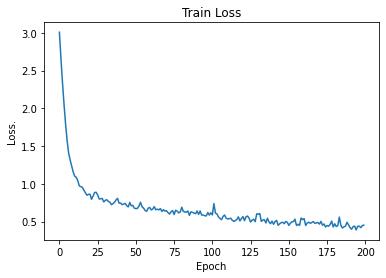



5 Layers, 16 Units, ReLu 



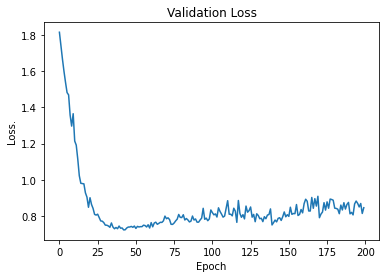



6 Layers, 32 Units, ReLu 



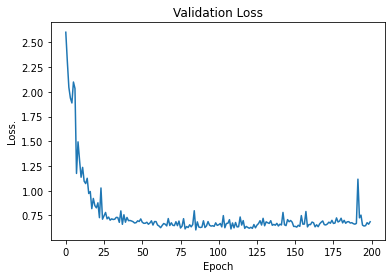



3 Layers, 20 Units, Relu 



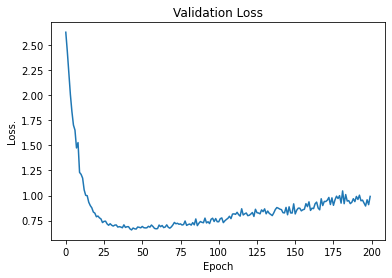



1 TanH Layer, 6 Layers, 32 Units, ReLu 



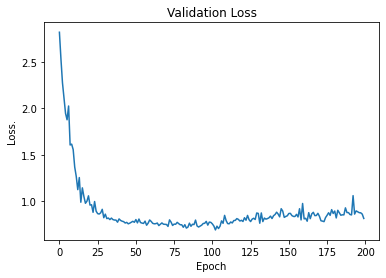

In [ ]:
for i in range(0,modelCount):
  print(modelLabels[i],"\n")
  plt.plot(histories[i]['loss'])
  plt.title('Train Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss.')
  plt.show()
  print("\n===================\n")

for i in range(0,modelCount):
  print(modelLabels[i],"\n")
  plt.plot(histories[i]['val_loss'])
  plt.title('Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss.')
  plt.show()
  print("\n===================\n")
